In [389]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices, demo_data, ContrastMatrix, Poly
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation
from sklearn import metrics
import plotly.plotly as py
import seaborn as sns
import collections
import statsmodels.api as sm
import string
from IPython.core.display import Image, HTML
from sklearn.feature_extraction.text import CountVectorizer
import pylab as pl


plt.style.use('fivethirtyeight')
%matplotlib inline

## Pre-Task: Describe the goals of your study

## Part 1: Aquire the Data

In [390]:
# psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
# password: gastudents

#### 1. Connect to the remote database

#### 2. Query the database and aggregate the data

In [391]:
df = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-05/train.csv')
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [393]:
df.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [394]:
pd.options.display.max_rows = 900
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [395]:
# import csv with additional age data
# dfa = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-05/titanic_ageupdate.csv')
# dfa.head(20)
print 'ugh'

ugh


In [396]:
# bring new ages into database

# # change indexes in df and dfa to passengerID
# dfa = dfa.set_index('PassengerId')
# df = df.set_index('PassengerId')

# df.Age = df.Age.fillna(value=dfa.Age)

# # print df.head(20)
# print dfa.head(20)

print 'ugh'
# df1 = df.merge(dfa, left_on='Zip Code', right_on='Area')

ugh


In [397]:
df1 = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-05/titanic.csv')

In [398]:
#remove index row
df1.pop('index')

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
30      30
31      31
32      32
33      33
34      34
35      35
36      36
37      37
38      38
39      39
40      40
41      41
42      42
43      43
44      44
45      45
46      46
47      47
48      48
49      49
50      50
51      51
52      52
53      53
54      54
55      55
56      56
57      57
58      58
59      59
60      60
61      61
62      62
63      63
64      64
65      65
66      66
67      67
68      68
69      69
70      70
71      71
72      72
73      73
74      74
75      75
76      76
77      77
78      78
79      79
80      80
81      81
82      82
83      83
84      84
85      85
86      86
87      87
88      88
89      89
90      90

In [399]:
# set passenger number as index
df1=df1.set_index('PassengerId')
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [400]:
#replace nans with median of column
# df1.fillna(df1.median(), inplace=True)

# unhash fillna for final

df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         865 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [402]:
print df1.describe()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  865.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.670717    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.164276    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000         NaN    0.000000    0.000000    7.910400
50%      0.000000    3.000000         NaN    0.000000    0.000000   14.454200
75%      1.000000    3.000000         NaN    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [403]:
df1_n = df1[['Survived','Age', 'SibSp', 'Parch', 'Fare']]
df1_n.fillna(df1_n.median(), inplace=True)

,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,0,22.00,1,0,7.2500
2,1,38.00,1,0,71.2833
3,1,26.00,0,0,7.9250
4,1,35.00,1,0,53.1000
5,0,35.00,0,0,8.0500
6,0,28.00,0,0,8.4583
7,0,54.00,0,0,51.8625
8,0,2.00,3,1,21.0750
9,1,27.00,0,2,11.1333


#### 2. Visualize the Data

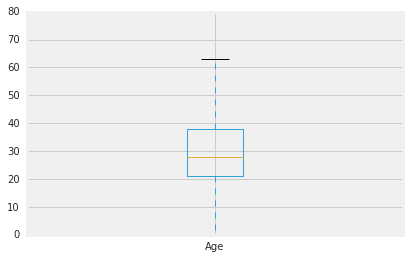

In [404]:
boxplots = df1[['Age']].boxplot(return_type='axes')

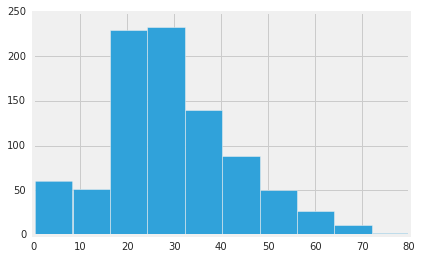

In [405]:
#histograms of numerical data
df1_n['Age'].hist()

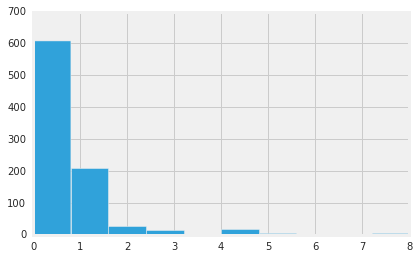

In [406]:
df1_n['SibSp'].hist()

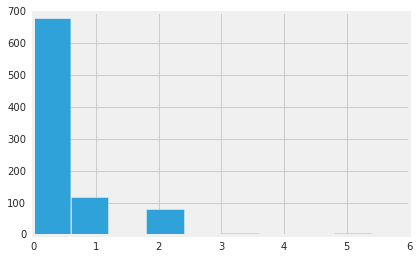

In [407]:
df1_n['Parch'].hist()

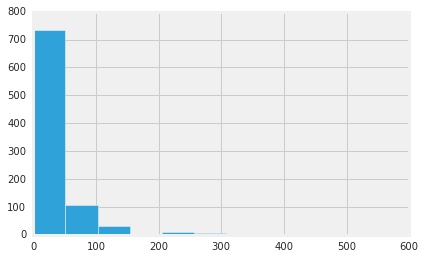

In [408]:
df1_n['Fare'].hist()

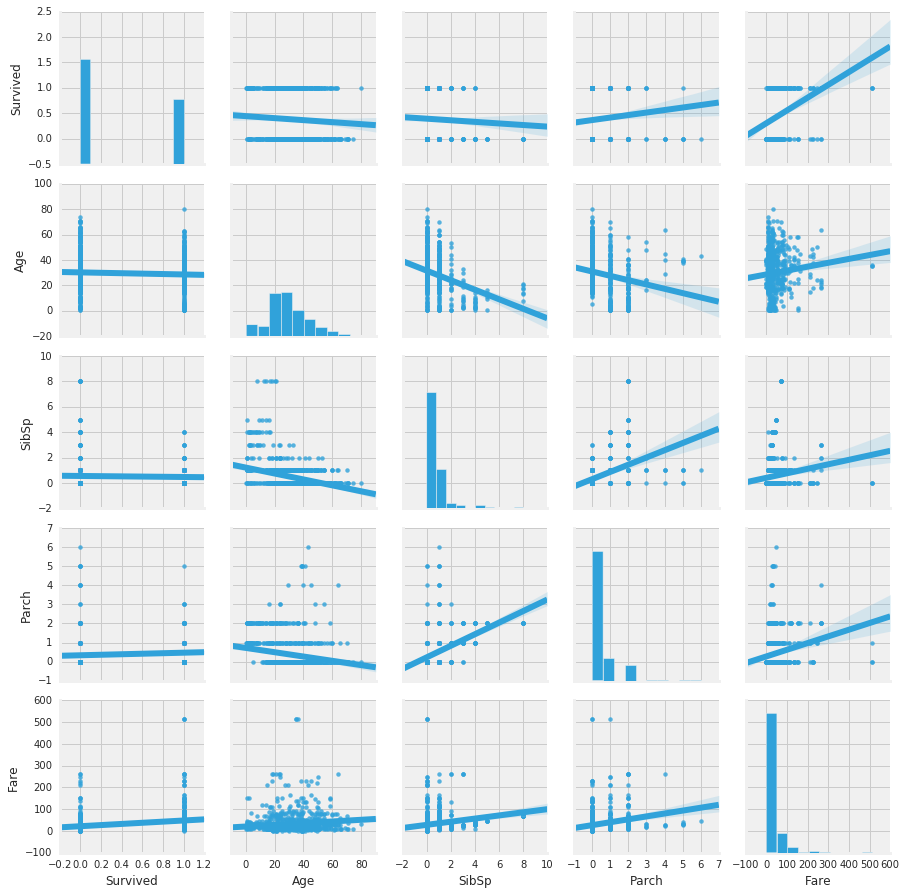

In [409]:
sns.pairplot(df1_n, kind="reg")

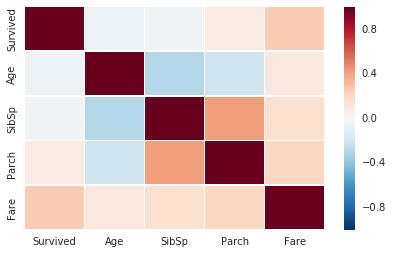

In [368]:
sns.heatmap(df1_n.corr(), linewidths=0.5)
# print "maybe make heatmap here"

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [412]:
gendummy = pd.get_dummies(df1['Sex'], prefix='Sex')

gendummy.head()

# gender = ("male", "female")
# gnum = (0,1)

# df1.replace(to_replace=gender, value = gnum, inplace=True)

# df1.head()

,Sex_female,Sex_male
PassengerId,,
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0


In [413]:
emb_dummy = pd.get_dummies(df1['Embarked'], prefix='Port')

emb_dummy.head()

,Port_C,Port_Q,Port_S
PassengerId,,,
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0


In [449]:
class_dummy = pd.get_dummies(df1['Pclass'], prefix='Class')

class_dummy.head()

,Class_1,Class_2,Class_3
PassengerId,,,
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0


In [371]:
# creating dummy vaiable for Embarked
# port = ("S", "C", "Q")
# pnum = (1,2,3)
# df1.replace(to_replace=port, value = pnum, inplace=True)
# df1.dropna(axis=0,inplace=True)

# df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,1.0
12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,1.0


In [450]:
#create tables to model gender, port, class

df_dgen = []
gencols_to_keep = ['Survived','Pclass','SibSp','Parch','Fare']
df_dgen = df1[gencols_to_keep].join(gendummy.ix[:,'Sex_male':])

#fit model of port impact
df_dport = []
portcols_to_keep = ['Survived','Pclass','SibSp','Parch','Fare']
df_dport = df1[portcols_to_keep].join(emb_dummy.ix[:,'Sex_male':])

#fit model of class impact
df_dclass = []
classcols_to_keep = ['Survived','Pclass','SibSp','Parch','Fare']
df_dclass = df1[classcols_to_keep].join(class_dummy.ix[:,'2':])


In [451]:
df_dgen['intercept'] = 1.0
print df_dgen.head()

             Survived  Pclass  SibSp  Parch     Fare  Sex_male  intercept
PassengerId                                                              
1                   0       3      1      0   7.2500       1.0        1.0
2                   1       1      1      0  71.2833       0.0        1.0
3                   1       3      0      0   7.9250       0.0        1.0
4                   1       1      1      0  53.1000       0.0        1.0
5                   0       3      0      0   8.0500       1.0        1.0


In [447]:
# 
gentrain_cols = df_dgen.columns[1:]

logit = sm.Logit(df_dgen['Survived'], data[gentrain_cols])

result_dgen = logit.fit()

result_dgen.summary2()

Optimization terminated successfully.
         Current function value: 0.458333
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.312     
Dependent Variable: Survived         AIC:              828.7501  
Date:               2016-10-23 17:09 BIC:              857.5042  
No. Observations:   891              Log-Likelihood:   -408.38   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      9.0493e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass       -0.8360    0.1268   -6.5905  0.0000  -1.0846  -0.5874
SibSp        -0.2564    0.1008   -2.5435  0.0110  -0.4539  -0.0588
Parch        -0.0888    0.1132   -0.7842  0.4329  -0.3106   0.1331
Fare          0.0034    0.0024    1.4508  0.1468  -0.0012   0.0080
Sex_male     -2.7594    0.1959  -14.0837  0.0000  -3.1434  -2.3754
intercept     3.1473    0.3752    8.3895  0.0000   2.4121   3.8826
=================================================================

"""

In [448]:
print result_dgen.conf_int()

                  0         1
Pclass    -1.084612 -0.587377
SibSp     -0.453885 -0.058815
Parch     -0.310615  0.133084
Fare      -0.001199  0.008031
Sex_male  -3.143444 -2.375412
intercept  2.412061  3.882639


In [ ]:
# it looks like there is a strong negative relationship between being male and a survivor and a slightly 

In [ ]:
#fit model of gender impact



In [436]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf



AttributeError: 'function' object has no attribute 'summary'

In [ ]:

print "Figure out how to strip out cabin number"

# creating column for cabin level
# df1.copy('Cabin')['Cabin_Number']
# df1.Cabin_Number = df1.columns.str.strip().str.upper()

# for c in 'Cabin':
#     if c.str.upper:
#         cabinlevel.append[0]
#         cabinnum.append[1:]
#     else:
#         cabinnum.append[c]
        

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [ ]:
# df1.head(3)

In [ ]:
# X = patsy.dmatrix('~ C(hour) + C(DayOfWeek) + C(PdDistrict)', sf_crime_sub)
# y = sf_crime_sub['Category'].values

print "figure out how patsy works"

In [372]:
print df1.corr()

# highest absolute correlations with Survived (ranked): Sex(.55), Age(.24), SibSp(.14), Fare(.13), Embarked (.10),Parch(.04),\
    # Pclass(.03)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.030513  0.545297 -0.240682  0.138202  0.042456   
Pclass   -0.030513  1.000000  0.060014 -0.340108 -0.086972  0.056288   
Sex       0.545297  0.060014  1.000000 -0.182792  0.152552  0.110574   
Age      -0.240682 -0.340108 -0.182792  1.000000 -0.167094 -0.284197   
SibSp     0.138202 -0.086972  0.152552 -0.167094  1.000000  0.262348   
Parch     0.042456  0.056288  0.110574 -0.284197  0.262348  1.000000   
Fare      0.128261 -0.311740  0.137185 -0.081372  0.291777  0.384970   
Embarked  0.098215 -0.093935  0.090463  0.036051  0.025391 -0.089424   

              Fare  Embarked  
Survived  0.128261  0.098215  
Pclass   -0.311740 -0.093935  
Sex       0.137185  0.090463  
Age      -0.081372  0.036051  
SibSp     0.291777  0.025391  
Parch     0.384970 -0.089424  
Fare      1.000000  0.195429  
Embarked  0.195429  1.000000  


In [373]:
# def examine_coefficients(model, dftitles):
#     dftitles = pd.DataFrame(
#         { 'Coefficient' : model.coef_[0] , 'Feature' : dftitles.columns}
#     ).sort_values(by='Coefficient')
#     return dftitles[dftitles.Coefficient !=0 ]

#### 2. Transform 'Y' into a 1-Dimensional Array for SciKit-Learn

In [374]:
# data["intercept"] = 1.0
# train_cols = data.columns[1:]

In [375]:
# data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,intercept
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,1.0
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0,1.0
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,1.0,1.0
12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,1.0,1.0


In [376]:

# df1_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 41.8 KB


In [378]:
# def knn_classifier(labeled_points, new_point, k):
#     """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
#     if k % 2 == 0:
#         return "Must use odd k, to prevent ties"
#     label_distances = []

#     for p in labeled_points:
#         #each  is '((x,y), class)'
#         #print(p[0], new_point)
#         distance = calculate_distance(p[0],new_point)
#         label_distances.append((distance,p[1]))
    
#     label_distances.sort() # Put them in order
#     #print(label_distances)
#     prediction = neighbor_vote([label[1] for label in label_distances[:k]])
#     return prediction

In [381]:
# from sklearn import datasets
# import pandas as pd
# import numpy as np
# from sklearn.cross_validation import train_test_split

# dfn = datasets.load_df1()
# X = dfn.data[:100]
# y = dfn.target[:100]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# # Split 70/30 into initial data and new points to classify
# training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
# test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

AttributeError: 'module' object has no attribute 'load_df1'

#### 3. Conduct the logistic regression

#### 4. Examine the coefficients to see our correlations

#### 6. Test the Model by introducing a *Test* or *Validaton* set 

#### 7. Predict the class labels for the *Test* set

#### 8. Predict the class probabilities for the *Test* set

#### 9. Evaluate the *Test* set

#### 10. Cross validate the test set

#### 11. Check the Classification Report

#### 12. What do the classification metrics tell us?

#### 13. Check the Confusion Matrix

#### 14. What does the Confusion Matrix tell us? 

#### 15. Plot the ROC curve

#### 16. What does the ROC curve tell us?

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [ ]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

## Part 8: [VERY BONUS] Decision trees, ensembles, bagging

#### 1. Gridsearch a decision tree classifier model on the data, searching for optimal depth. Create a new decision tree model with the optimal parameters.

#### 2. Compare the performace of the decision tree model to the logistic regression and kNN models.

#### 3. Plot all three optimized models' ROC curves on the same plot. 

#### 4. Use sklearn's BaggingClassifier with the base estimator your optimized decision tree model. How does the performance compare to the single decision tree classifier?

#### 5. Gridsearch the optimal n_estimators, max_samples, and max_features for the bagging classifier.

#### 6. Create a bagging classifier model with the optimal parameters and compare it's performance to the other two models.